# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import itertools
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D as ax

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass


# Question 1

**Explain how you solve the model**

In [2]:
# a. Solving the model

OurModel = HouseholdSpecializationModelClass()

arsigma=np.array([0.5,1,1.5]) 

aralpha=np.array([0.25,0.5,0.75])

result2=[]
for k,v in itertools.product(arsigma,aralpha): #for all combinations in the two arrays
    OurModel.par.sigma=k #values from the first array is used as sigma parameters in the model
    OurModel.par.alpha=v #values from second array used as alpha parameters
    temp=OurModel.solve_discrete() #naming the solution function
    result2.append(temp.g) #appending the solutions of the variable "g"(HF/HM) to the empty list "result2"

print(result2)





[0.5454545454545454, 1.0, 1.8333333333333333, 0.3076923076923077, 1.0, 3.25, 0.21428571428571427, 1.0, 4.666666666666667]


In [3]:

# b. Illustrating results

# i. Changing the solution matrix from 9x1 list to 3x3 dataframe and adding alpha and sigma as rows and columns
ser=pd.Series(result2)
ser2=ser.values.reshape((3,3))
df=pd.DataFrame(ser2, index=[arsigma], columns=[aralpha])

# ii. Style
s=pd.concat( #creating a dataframe with concatenated row and column titles, and saving it as "s"
    [pd.concat(
    [df],
    keys=['alpha'], axis=1)],
    keys=['sigma'])

cm = sns.light_palette('blue', as_cmap=True) #creating and naming a color palette
s.style.\
    set_caption('Table 0 - values of HF/HM for certain parameter value combinations').\
    background_gradient(cmap=cm, axis=None).\
    format_index(axis=0,precision=2).\
    format_index(axis=1, precision=2).\
    format(precision=4) #styling the "s" dataframe with caption, background color gradient, and formatting decimals









# Question 2

Explain your code and procedure

In [4]:

# a. Solving the model

OurModel2 = HouseholdSpecializationModelClass()

arwF=np.array([0.8,0.9,1.0,1.1,1.2]) #array of values that wF can take for the question


result3=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of HF/HM("g") to a list
    OurModel2.par.wF=k
    temp=OurModel2.solve_discrete()
    result3.append(temp.g)

result3a=np.log(result3)

print(result3a)

result4=[] 
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of wF/wM("h") to a list
    OurModel2.par.wF=k
    temp=OurModel2.solve_discrete()
    result4.append(temp.h)

result4a=np.log(result4)

print(result4a)





[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


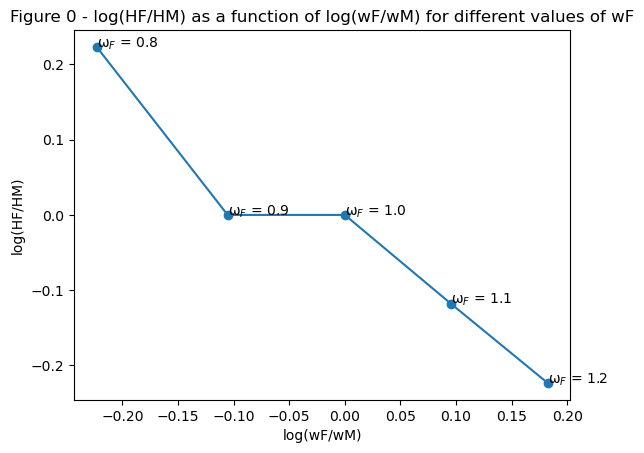

In [5]:
# b. Illustrating the results

plt.plot(result4a, result3a, marker='o')
plt.title('Figure 0 - log(HF/HM) as a function of log(wF/wM) for different values of wF')
plt.ylabel('log(HF/HM)')
plt.xlabel('log(wF/wM)')
for i, txt in enumerate(arwF): #annotating the data points with the corresponding values from the wF array
    plt.annotate("ω$_{F}$ = "+ str(txt),(result4a[i],result3a[i]))

plt.show()

# Question 3

Explain your code and procedure

In [6]:
# a. solving the model
OurModel3 = HouseholdSpecializationModelClass()

vect = np.linspace(0.8,1.2,5)

result5=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of HF/HM("g") to a list
    OurModel3.par.wF=k
    temp=OurModel3.solve()
    result5.append(temp.g)


result5a=np.log(result5)
print(result5a)



result6=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of wF/wM("h") to a list
    OurModel3.par.wF=k
    temp=OurModel3.solve()
    result6.append(temp.h)

result6a=np.log(result6)
print(result6a)

[ 2.23143643e-01  1.05360372e-01  1.25199162e-09 -9.53102744e-02
 -1.82321545e-01]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


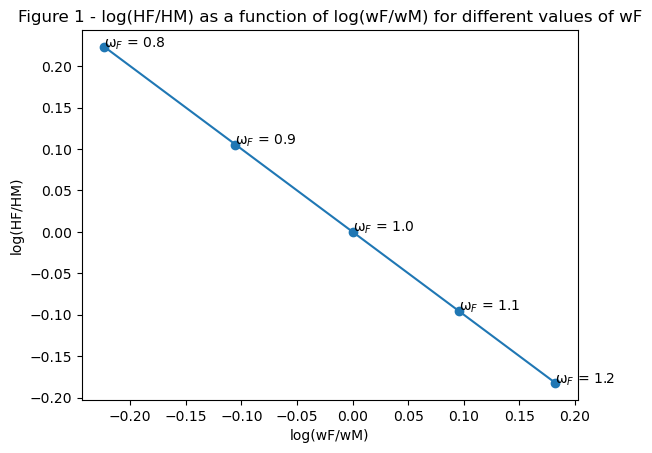

In [7]:
# b. illustrating results
plt.plot(result6a, result5a, marker='o')
plt.title('Figure 1 - log(HF/HM) as a function of log(wF/wM) for different values of wF')
plt.ylabel('log(HF/HM)')
plt.xlabel('log(wF/wM)')
for i, txt in enumerate(arwF): #annotating the data points with the corresponding values from the wF array
    plt.annotate("ω$_{F}$ = "+ str(txt),(result6a[i],result5a[i]))

plt.show()

# Question 4

In [131]:

OurModel4 = HouseholdSpecializationModelClass()

temp1=OurModel4.estimate()


print(f'α: {temp1.alpha}')
print(f'σ: {temp1.sigma}')

print(f'sum of squares for chosen values: {OurModel4.deviation(temp1.alpha, temp1.sigma)}')







α: 0.9999999999999
σ: 0.01323836517333439
sum of squares for chosen values: 0.01283685063143643


In [133]:
alphalist = np.linspace(0.5,0.9,15)
sigmalist = np.linspace(0,0.5,15)

errorvalues = np.zeros((15, 15))
for i, alpha in enumerate(alphalist): #
    for j, sigma in enumerate(sigmalist):
        OurModel4.par.alpha=i 
        OurModel4.par.sigma=j 
        temp1=OurModel4.deviation(alpha, sigma) 
        errorvalues[i,j] = temp1

    

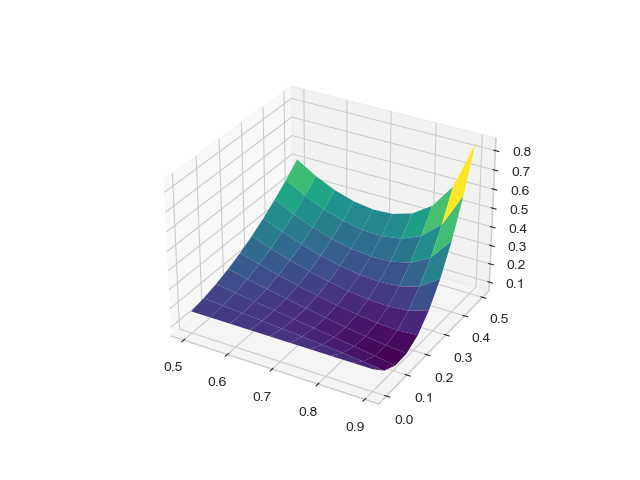

Text(0.10787434422876359, 0.014452421710067012, 'sum of squares')

In [111]:


%matplotlib widget
# a. plot


alphaspace, sigmaspace = np.meshgrid(alphalist,sigmalist,indexing='ij')

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.plot_surface(alphaspace,sigmaspace,errorvalues, cmap='viridis')

plt.show()

# b. add labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('sum of squares')


The alpha and sigma values that produce results nearest the ones arrived at by Siminski and Yetsenga (2022) imply a function where:
 1. because of an alpha value approaching 1, female home productivity is very high relative to male, likely asymptotically approaching infinity.
 
 2. due to a low elasticity of substitution, male labor in the home is not easily replaced by female labor (and vice versa), so increasing inputs of female labor will decrease female marginal productivity while increasing male  

In the end, because alpha appears to be asymptotically approaching 1 in the solution, it is likely dominating the second effect, so the end result is that females are more productive at any level of hours worked at home. 

# Question 5

ADD CONCISE CONLUSION.